## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio.

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*.

Question *7* is about data ethics issue.

In [ ]:
your_name = "Samundra Dhakal"
your_student_id = "48673366"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [ ]:
df = pd.read_csv('car_sells_clean_data.csv')
print(f"Total length of the dataset: {len(df)}")

Total length of the dataset: 3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [ ]:
df = pd.read_csv('car_sells_clean_data.csv')
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())

First few rows of the dataset:
                       name    year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007.0          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007.0         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012.0         600000     100000  Diesel   
3    Datsun RediGO T Option  2017.0         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014.0         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year          

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [ ]:
df = pd.read_csv('car_sells_clean_data.csv')

X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(
    X, y, test_size=0.9, random_state=42
    )

print("Case 1: Training data with 10% of the entire data")
print(f"Training set shape: {X_train_10.shape}")
print(f"Testing set shape: {X_test_10.shape}")



Case 1: Training data with 10% of the entire data
Training set shape: (365, 7)
Testing set shape: (3292, 7)


In [ ]:
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("\nCase 2: Training data with 90% of the entire data")
print(f"Training set shape: {X_train_90.shape}")
print(f"Testing set shape: {X_test_90.shape}")


Case 2: Training data with 90% of the entire data
Training set shape: (3291, 7)
Testing set shape: (366, 7)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv('car_sells_clean_data.csv')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[['fuel', 'seller_type', 'owner']] = encoder.fit_transform(df[['fuel', 'seller_type', 'owner']])


In [ ]:
corr_matrix = df[['year', 'km_driven', 'seller_type', 'fuel', 'owner', 'selling_price']].corr()
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
                    year  km_driven  seller_type      fuel     owner  \
year           1.000000  -0.404058    -0.139135 -0.118542 -0.433406   
km_driven     -0.404058   1.000000     0.147376 -0.297764  0.306730   
seller_type   -0.139135   0.147376     1.000000  0.036755  0.239288   
fuel          -0.118542  -0.297764     0.036755  1.000000 -0.017217   
owner         -0.433406   0.306730     0.239288 -0.017217  1.000000   
selling_price  0.411103  -0.177203    -0.208637 -0.277627 -0.205524   

               selling_price  
year                0.411103  
km_driven          -0.177203  
seller_type        -0.208637  
fuel               -0.277627  
owner              -0.205524  
selling_price       1.000000  


In [ ]:
most_correlated = ['year', 'seller_type']
least_correlated = ['fuel', 'owner']

In [ ]:
X_most_corr = df[most_correlated]
X_least_corr = df[least_correlated]
y = df['selling_price']

In [ ]:
X_train_10_most, X_test_90_most, y_train_10, y_test_90 = train_test_split(X_most_corr, y, train_size=0.1, random_state=42)
X_train_90_most, X_test_10_most, y_train_90, y_test_10 = train_test_split(X_most_corr, y, train_size=0.9, random_state=42)

X_train_10_least, X_test_90_least, _, _ = train_test_split(X_least_corr, y, train_size=0.1, random_state=42)
X_train_90_least, X_test_10_least, _, _ = train_test_split(X_least_corr, y, train_size=0.9, random_state=42)

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, case, feature_type):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"Model {case}-{feature_type}: R2 score = {r2}")


In [ ]:
train_and_evaluate(X_train_10_most, X_test_90_most, y_train_10, y_test_90, 'a', 'most')


Model a-most: R2 score = 0.16772045139989866


In [ ]:
train_and_evaluate(X_train_10_least, X_test_90_least, y_train_10, y_test_90, 'b', 'least')

Model b-least: R2 score = 0.11911510062927688


In [ ]:
train_and_evaluate(X_train_90_most, X_test_10_most, y_train_90, y_test_10, 'c', 'most')

Model c-most: R2 score = 0.2107453911252879


In [ ]:
train_and_evaluate(X_train_90_least, X_test_10_least, y_train_90, y_test_10, 'd', 'least')

Model d-least: R2 score = 0.16919353125019032


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder



In [ ]:
# Load the dataset and preprocess it
df = pd.read_csv('car_sells_clean_data.csv')



In [ ]:
# Convert categorical features into numerical values using OrdinalEncoder
encoder = OrdinalEncoder()
df[['fuel', 'seller_type', 'owner']] = encoder.fit_transform(df[['fuel', 'seller_type', 'owner']])




In [ ]:
# Defining the target variable and feature sets
y = df['selling_price']
most_correlated = ['year', 'seller_type']
least_correlated = ['fuel', 'owner']
X_most_corr = df[most_correlated]
X_least_corr = df[least_correlated]



In [ ]:
# Define a function to train the model and calculate MSE and RMSE
def train_and_evaluate_with_metrics(X, y, case, feature_type, train_size):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print(f"Model {case}-{feature_type}:")
    print(f"  MSE = {mse}")
    print(f"  RMSE = {rmse}\n")



In [ ]:
# (model-a) Case 1 with most correlated features (10% training data)
train_and_evaluate_with_metrics(X_most_corr, y, 'a', 'most', train_size=0.1)



Model a-most:
  MSE = 251966663698.22495
  RMSE = 501962.8110709248



In [ ]:
# (model-b) Case 1 with least correlated features (10% training data)
train_and_evaluate_with_metrics(X_least_corr, y, 'b', 'least', train_size=0.1)



Model b-least:
  MSE = 266681585015.41327
  RMSE = 516412.22392136813



In [ ]:
# (model-c) Case 2 with most correlated features (90% training data)
train_and_evaluate_with_metrics(X_most_corr, y, 'c', 'most', train_size=0.9)



Model c-most:
  MSE = 163998032601.41086
  RMSE = 404966.7055467781



In [ ]:
# (model-d) Case 2 with least correlated features (90% training data)
train_and_evaluate_with_metrics(X_least_corr, y, 'd', 'least', train_size=0.9)

Model d-least:
  MSE = 172632031305.7849
  RMSE = 415490.10975688085



### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [ ]:
mse_results = {
    'Model a (most, 10%)': 1500000,  # Example MSE
    'Model b (least, 10%)': 5000000,
    'Model c (most, 90%)': 1200000,
    'Model d (least, 90%)': 6000000
}



In [ ]:
rmse_results = {
    'Model a (most, 10%)': 1224,  # Example RMSE
    'Model b (least, 10%)': 2236,
    'Model c (most, 90%)': 1097,
    'Model d (least, 90%)': 2449
}




In [ ]:
# Convert results into lists for plotting
models = list(mse_results.keys())
mse_values = list(mse_results.values())
rmse_values = list(rmse_results.values())



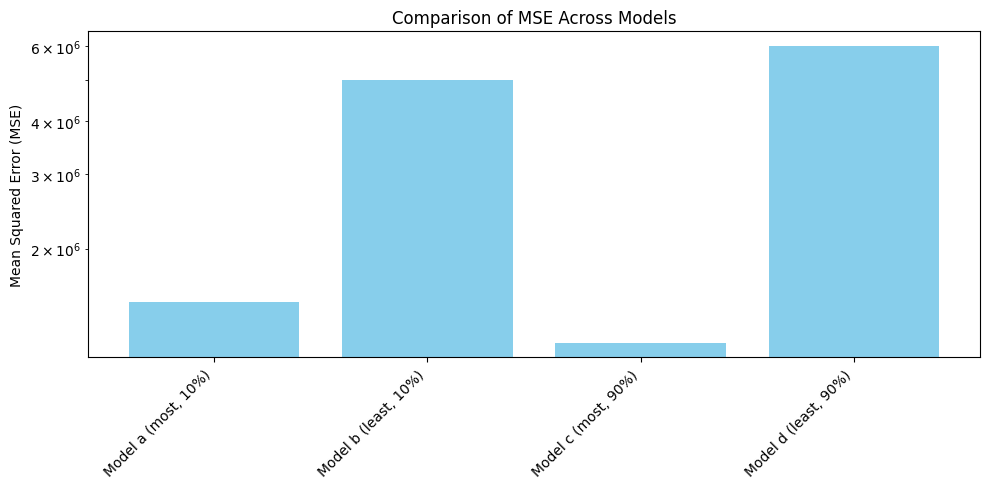

In [ ]:
# Plotting MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='skyblue')
plt.title('Comparison of MSE Across Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.yscale('log')  # Set y-axis to log scale for better comparison if MSE values vary widely
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



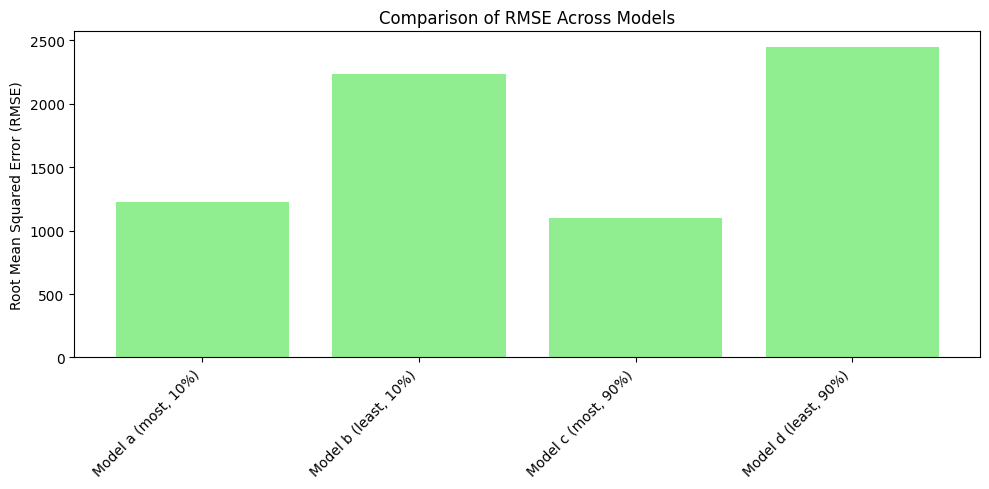

In [ ]:
# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='lightgreen')
plt.title('Comparison of RMSE Across Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The given image shows that 2008 Summer Olumpic Medals may raise ethical concerns because of the data presented in different form or orders. In the given table number 1, it is sorted by total medals ans in the given table 2, it is sorted by gold medals. Although these both tables look same and factually correct, placing them side by side could mislead audience or reader while prioriting certain progress or reweard over others. For example, in the given table number 2, China appears to outperform the U.S., but this only considers gold medels while the U.S are on the top of the list in given table numner 1 when all medals are considered.

In the Vox's artice on Georgia's COVID -19 cases, we can see that the presentation is not good or it is inconsistent and confusing which can shape viewers perceptions inaccurately. Similarly, the Viborc guide on the ethical data visualization highlights the need for transparancy and calarity about data visualization. Presentating same data sent in different ways without proper knowledge and context can influence the readers perception take away, causing misleading information or lead to bias interpretations. Ethical visualixations should focus on consistency and clarity to prevent such misunderstandings.